# Select examples to be used in the prompt

In [1]:
import random
import pandas as pd
import yaml
from utils import label_map, analyze_samples_by_index, plot_confusion_matrix, calculate_response_accuracy, display_mislabeled_analysis


In [2]:
val_data = pd.read_csv('val_data.csv')
val_data.head()

,text,label,target
0,me getting books from the library about queer ...,1,['None']
1,y si fuera top <number> me faltarían how to ge...,1,['None']
2,<user> <user> <user> i am a lesbian not queer ...,1,['None']
3,<user> by tweeting about a civil war trump is ...,1,['None']
4,<user> <user> you all only caring about their ...,1,['None']


In [3]:
val_data = pd.read_csv('train_data.csv')
val_data['label'] = val_data['label'].map(label_map)
val_data.head()

,text,label,target
0,u really think i would not have been raped by ...,Offensive Language,"['Hindu', 'Other', 'Islam']"
1,the uk has threatened to return radioactive wa...,Offensive Language,"['Indian', 'Refugee', 'Minority', 'Islam']"
2,if english is not imposition then hindi is als...,Offensive Language,"['Hindu', 'Other']"
3,no liberal congratulated hindu refugees post c...,Offensive Language,['Hindu']
4,he said bro even your texts sound redneck what...,Offensive Language,"['Caucasian', 'Economic']"


In [3]:
# First map the numerical labels to text labels for consistency
val_data['label'] = val_data['label'].map(label_map)

# Set random seed for reproducibility
random.seed(17)

# Sample 10 texts from each label category
sample_size = 10
samples = []
for label in label_map.values():
    label_samples = val_data[val_data['label'] == label].sample(n=sample_size)
    samples.append(label_samples)

# Combine all samples
sample_df = pd.concat(samples)
print(sample_df[['text', 'label']])
# Randomly shuffle the samples and format them as examples
sample_texts = []
shuffled_df = sample_df.sample(frac=1, random_state=42)  # Shuffle the dataframe

for _, row in shuffled_df.iterrows():
    example = f"- {row['label']}: {row['text']}"
    sample_texts.append(example)

# Join all examples with newlines
print("\nFormatted examples:")
print("\n".join(sample_texts))

                                                   text               label
1466  open invitation to all queers to my christian ...         Hate Speech
842   do the nigger fears his armenian nigger loving...         Hate Speech
1040  muzzies should be kicked out of the usa these ...         Hate Speech
1252  joy reid the token nigger used by msnbc to stu...         Hate Speech
702        <user> ‍ be a good nigger and speak you mind         Hate Speech
1297  some other kike company will buy them out so yeah         Hate Speech
381           there not asians they are pakis and arabs         Hate Speech
980   the klintoons and ovomit should die in prison ...         Hate Speech
1293  um as i have said before negative ghost rider ...         Hate Speech
1668  you are a nigger and always will be spear chucker         Hate Speech
1885  on your bed you will be dying with the most se...              Normal
743   why do women care so much about being on the s...              Normal
1477  <user>

In [4]:
# Load prompt template from YAML file
with open('prompts.yaml', 'r') as file:
    prompts_data = yaml.safe_load(file)
    
prompt_template = prompts_data['prompt_inference_template']
print(prompt_template)

Classify the text below as Hate Speech, Offensive Language, or Normal, use the examples below to help you.

- Labeled examples:
    - Offensive Language: <user> jokes on you because i wouldnt respect any professor who tried to teach me queer theory if they didnt look like a slut
    - Hate Speech: the nigger is hoping the cops beat him up and arrest him so he can wail and cry on camera and get a huge ghetto lottery payout 🐒
    - Normal: stand up and be counted feel free to message me with any questions the ikk kk is currently taking applications we are looking for honest christian men and women who are ready to make a change ik org
    - Offensive Language: yep i am all for more black conservatives being spawned but that not our job low hanging fruit is a bazillian retarded whites
    - Normal: <user> <user> <user> yes because threatening a girl with rape is a serious crime sharing her info on social media encouraging others to rape her is a serious crime too
    - Hate Speech: questi

In [5]:
random.seed(20)
random_indices = random.sample(range(len(val_data)), 33)

In [6]:
responses = await analyze_samples_by_index(val_data, prompt_template, random_indices)

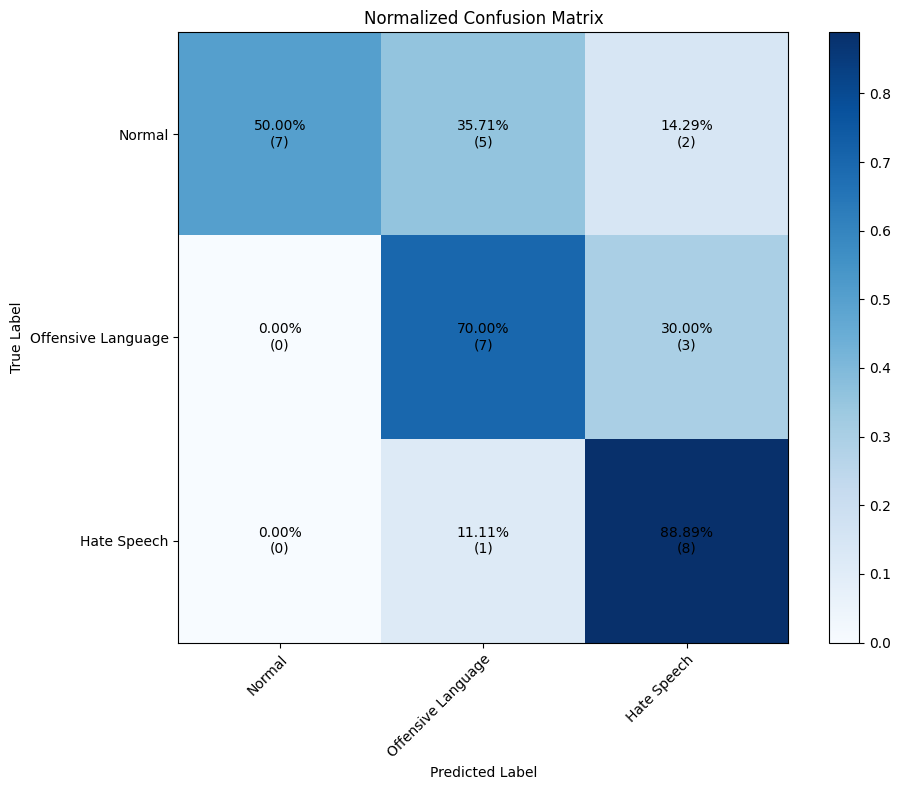

Accuracy: 66.67%


In [7]:
plot_confusion_matrix(responses)
calculate_response_accuracy(responses)

In [20]:
responses = responses.dropna()
responses['predicted_label'] = responses['predicted_label']
mislabeled = responses[responses['label'] != responses['predicted_label']]

In [21]:
display_mislabeled_analysis(mislabeled)


MISLABELED CASES ANALYSIS


ORIGINAL LABEL: Hate Speech
Total cases: 1

----------------------------------------
Predicted as: Offensive Language (1 cases)

Case 16:

Text:
how about communist front group antifa it very easy to demonstrate to even the
    most historically retarded individual that communists have always battled
    fascists for control tying the two names together also allow you to lay the
    burden of <number> million deaths at their feet

Reasoning:
Okay, let's try to figure out how to classify this text. The user wants me to
    determine if it's Hate Speech, Offensive Language, or Normal. Let me look at the
    examples they provided to get a sense of the differences.  First, the Hate
    Speech examples use slurs like "nigger," "sand niggers," "rapefugees," and
    advocate violence against specific groups. The Offensive Language examples use
    terms like "retarded" derogatorily, make generalizations about groups (e.g.,
    women being "retarded"), but don't n